# Foundations of Data Science Project - Diabetes Analysis

### Brent A. Thorne
<brentathorne@gmail.com>

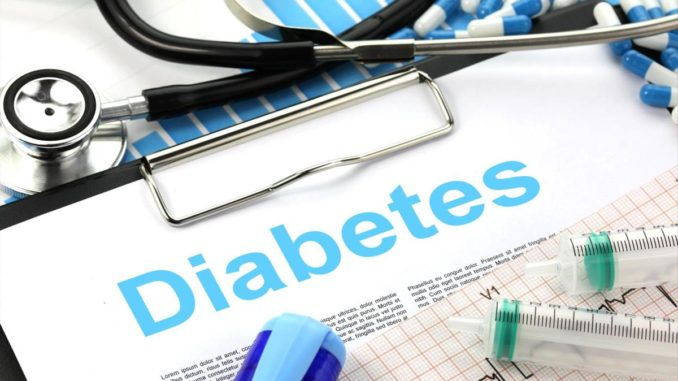

Image courtesy of the New Jersey State Libraray, <https://creativecommons.org/licenses/by-sa/3.0/#>

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America called the Akimel O'odham tribe or "River People" (also know as the Pima tribe). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we analyze different aspects of Diabetes in the Akimel O'odham tribe through Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant <font color=blue>(count)</font>
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test <font color=red>$\text{ *missing units }$</font> <font color=blue> $\left( \frac{mg}{dL} \right)$</font> are the conventional units
* BloodPressure: Diastolic blood pressure <font color=blue>(mm Hg)</font>
* SkinThickness: Triceps skin fold thickness <font color=blue>(mm)</font>
* Insulin: 2-Hour serum insulin (mu U/ml)  $\implies$ <font color=blue>$\left(\frac{\mu IU}{ml}\right)$</font>  are the conventional insulin concetration units
* BMI: Body mass index (weight in kg/(height in m)^2) $\implies$<font color=blue>$\left( \frac{kg}{m^2} \right)$</font>
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history. <font color=blue>(scalar)</font>
* Age: Age in <font color=blue>years</font>
* Outcome: Class variable <font color=blue>(0: a person is not diabetic or 1: a person is diabetic)</font>

<font color=red>*Note missing units, let's try not to harm anyone with careless mitakes.</font>

"I'm not a doctor but I like to play doctor."
--Peter Bergman (misquoted)

## Q1: Import the necessary libraries and briefly explain the use of each library (3 Marks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Write your Answer here: 

##### Note: The above library descriptions are taken directly from the documentation pages for each libraray. 

## Q2: Read the given dataset (2 Marks)

In [2]:
pima = pd.read_csv("diabetes.csv")

## Q3. Show the last 10 records of the dataset. How many columns are there? (2 Marks)

In [3]:
pima.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,20,79,37.5,0.197,26,0
759,6,190,92,20,79,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,79,44.0,0.403,43,1
762,9,89,62,20,79,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,79,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,79,30.1,0.349,47,1
767,1,93,70,31,79,30.4,0.315,23,0


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Write your Answer here: 


## Q4. Show the first 10 records of the dataset (2 Marks)

In [5]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.600000,0.627,50,1
1,1,85,66,29,79,26.600000,0.351,31,0
2,8,183,64,20,79,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,20,79,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,69,20,79,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,20,79,31.992578,0.232,54,1


## Q5. What do you understand by the dimension of the dataset? Find the dimension of the `pima` dataframe. (3 Marks)

In [6]:
pima.shape

(768, 9)

#### Write your Answer here: 


## Q6. What do you understand by the size of the dataset? Find the size of the `pima` dataframe. (3 Marks)

In [7]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Write your Answer here: 


## Q7. What are the data types of all the variables in the data set? (2 Marks)
**Hint: Use the info() function to get all the information about the dataset.**

In [8]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Write your Answer here: 


## Q8. What do we mean by missing values? Are there any missing values in the `pima` dataframe? (4 Marks)

In [9]:
pima.isna().values.any()

False

#### Write your Answer here: 


## Q9. What do the summary statistics of the data represent? Find the summary statistics for all variables except 'Outcome' in the `pima` data. Take one column/variable from the output table and explain all its statistical measures. (5 Marks)

In [10]:
pima.iloc[: , 0 : 8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.450805,0.471876,33.240885
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
display(pima.Age.sum()/pima.Age.count())  # Arithmetic mean

33.240885416666664

#### Write your Answer here: 


##### See also:  https://en.wikipedia.org/wiki/Quartile

### Boxplot (with quartiles and an interquartile range) and a probability density function
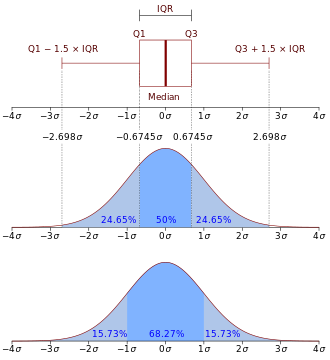
Image courtesy Wikipedia. https://creativecommons.org/licenses/by-sa/2.

## Q 10. Plot the distribution plot for the variable 'BloodPressure'. Write detailed observations from the plot. (2 Marks)

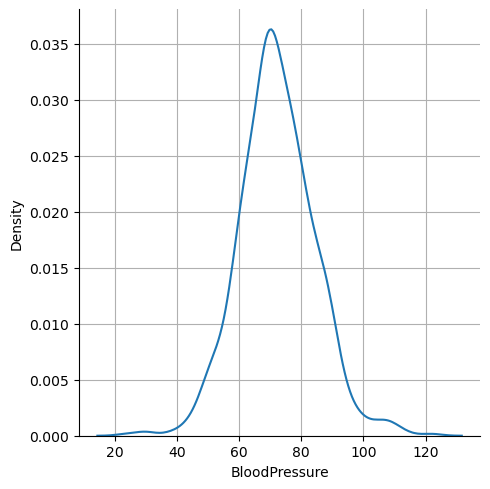

In [12]:
sns.displot(pima['BloodPressure'], kind = 'kde')
plt.grid() # grids improve readablity
plt.show()

#### Write your Answer here: 


### KDE plot with smoothing bandwidth adjusted

Take care, an over-smoothed estimate might erase meaningful features while under-smoothing can obscure the shape of the distibution.

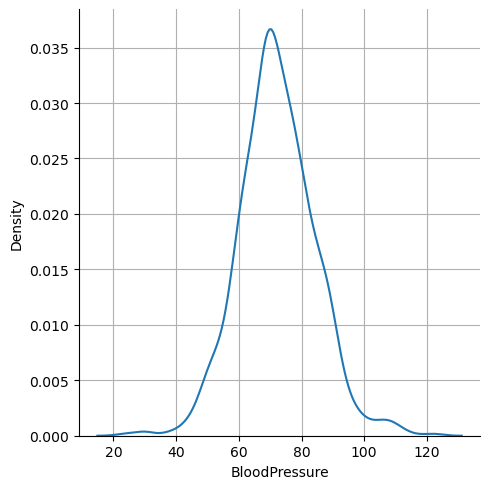

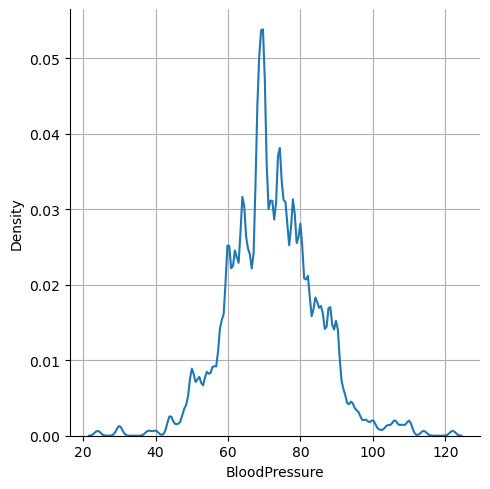

In [13]:
sns.displot( pima['BloodPressure'], kind = 'kde', bw_adjust=.95)
plt.grid() # grids improve readablity
sns.displot( pima['BloodPressure'], kind = 'kde', bw_adjust=.25)
plt.grid() # grids improve readablity

## Q 11. What is the 'BMI' of the person having the highest 'Glucose'? (2 Marks)

In [14]:
pima[pima['Glucose'] == pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

In [15]:
# let's take a closer look at this individual
display(pima[pima.Glucose == pima.Glucose.max()]) # that's a pretty high predigree function

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,79,42.9,1.394,22,1


#### Write your Answer here: 


##### Note: No units were provided for 'Glucose' values in this study.  We also assume that the max glucose was not shared across multiple individuals and that each individual is represented only once in the dataframe.

## Q12.
### 12.1 What is the mean of the variable 'BMI'? 
### 12.2 What is the median of the variable 'BMI'? 
### 12.3 What is the mode of the variable 'BMI'?
### 12.4 Are the three measures of central tendency equal?

### (4 Marks)

In [16]:
m1 = pima['BMI'].mean() # mean
print(m1)

m2 = pima['BMI'].median()  # median
print(m2)

m3 = pima['BMI'].mode()[0]  # mode
print(m3)

32.45080515543619
32.0
32.0


#### Write your Answer here: 


##### Going Deeper:
Consider BMI distributions.

### Skewness
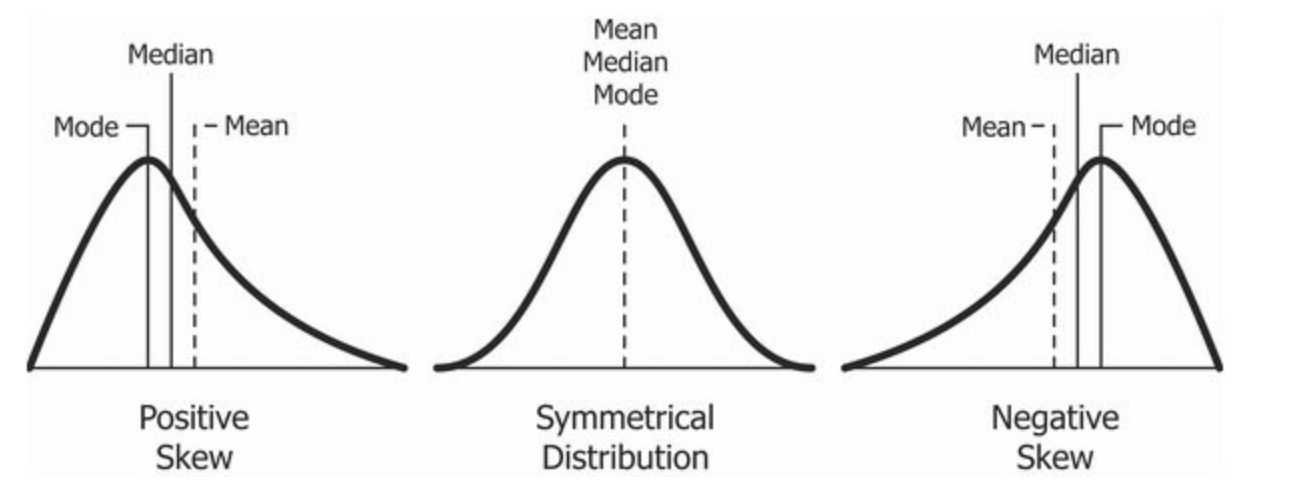
Image courtesy wikipedia. https://creativecommons.org/licenses/by-sa/4.0

###### See also: https://en.wikipedia.org/wiki/Skewness

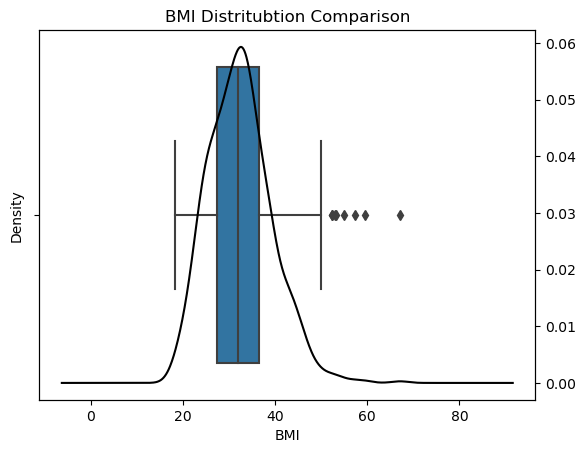

<IPython.core.display.Latex object>

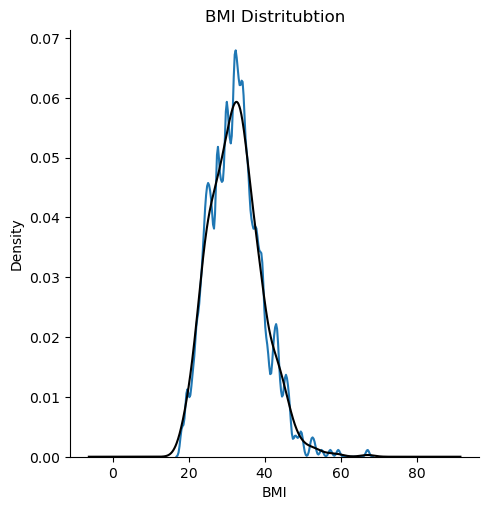

In [17]:
import sympy as sym
from IPython.display import display, Math, Latex # Well, aren't you fancy?

sns.boxplot(x=pima.BMI)
pima.BMI.plot.kde(color='black',secondary_y=True).set(title="BMI Distritubtion Comparison")
plt.show()

sns.displot( pima['BMI'], kind = 'kde', bw_adjust=.25)
pima.BMI.plot.kde(color='black').set(title="BMI Distritubtion")

display(Latex(f'Skew: {sym.latex(pima.BMI.skew().round(3))} $\implies \LaTeX$ is pretty')) # fancy

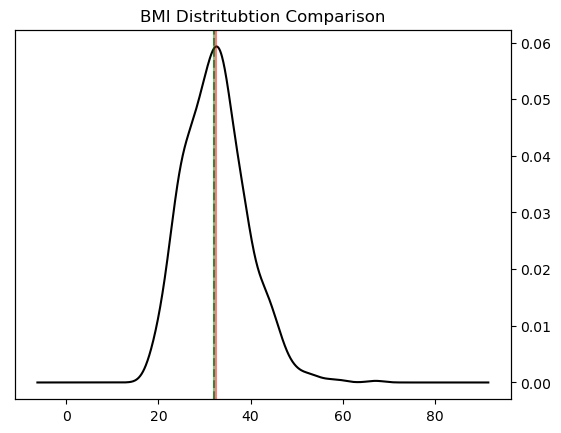

In [18]:
pima.BMI.plot.kde(color='black',secondary_y=True).set(title="BMI Distritubtion Comparison")#, xlim=[31,33])
plt.axvline(x = m1, color = 'r', label = 'mean', alpha=0.5)
plt.axvline(x = m2, color = 'black', linestyle ='--',label = 'median', alpha=0.5)
plt.axvline(x = m3, color = 'green', label = 'mode', alpha=0.5)

## Q13. How many women's 'Glucose' levels are above the mean level of 'Glucose'? (2 Marks)

In [19]:
pima[pima['Glucose'] > pima['Glucose'].mean()].shape[0]

343

#### Write your Answer here: 


## Q14. How <font color = blue>many</font> women have their 'BloodPressure' equal to the median of 'BloodPressure' and their 'BMI' less than the median of 'BMI'? (2 Marks)

In [20]:
pima[(pima['BloodPressure'] == pima['BloodPressure'].median()) & (pima['BMI'] < pima['BMI'].median())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
14,5,166,72,19,175,25.8,0.587,51,1
93,4,134,72,20,79,23.8,0.277,60,1
103,1,81,72,18,40,26.6,0.283,24,0
205,5,111,72,28,79,23.9,0.407,27,0
299,8,112,72,20,79,23.6,0.840,58,0
325,1,157,72,21,168,25.6,0.123,24,0
330,8,118,72,19,79,23.1,1.476,46,0
366,6,124,72,20,79,27.6,0.368,29,1
380,1,107,72,30,82,30.8,0.821,24,0
393,4,116,72,12,87,22.1,0.463,37,0


In [63]:
# this question is about how many so let's do that instead...
bp = pima[(pima['BloodPressure'] == pima['BloodPressure'].median()) & (pima['BMI'] < pima['BMI'].median())]

# How do I love thee? Let me count the ways.
print(bp.shape[0])
print(len(bp.index))
print(len(bp.axes[0]))

22
22
22


In [62]:
browning = ['How do I love thee? Let me count the ways.',
            'I love thee to the depth and breadth and height',
            'My soul can reach, when feeling out of sight',
            'For the ends of being and ideal grace.',
            "I love thee to the level of every day's",
            "Most quiet need, by sun and candle-light.",
            'I love thee freely, as men strive for right.',
            'I love thee purely, as they turn from praise.',
            'I love thee with the passion put to use',
            "In my old griefs, and with my childhood's faith.",
            'I love thee with a love I seemed to lose',
            'With my lost saints. I love thee with the breath,',
            'Smiles, tears, of all my life; and, if God choose,',
            'I shall but love thee better after death.',
            '--Elizabeth Barrett Browning']
for line in browning: print(line)

How do I love thee? Let me count the ways.
I love thee to the depth and breadth and height
My soul can reach, when feeling out of sight
For the ends of being and ideal grace.
I love thee to the level of every day's
Most quiet need, by sun and candle-light.
I love thee freely, as men strive for right.
I love thee purely, as they turn from praise.
I love thee with the passion put to use
In my old griefs, and with my childhood's faith.
I love thee with a love I seemed to lose
With my lost saints. I love thee with the breath,
Smiles, tears, of all my life; and, if God choose,
I shall but love thee better after death.
--Elizabeth Barrett Browning


#### Write your Answer here: 


## Q15. Create a pairplot for the variables 'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction'. Write your observations from the plot. (3 Marks)

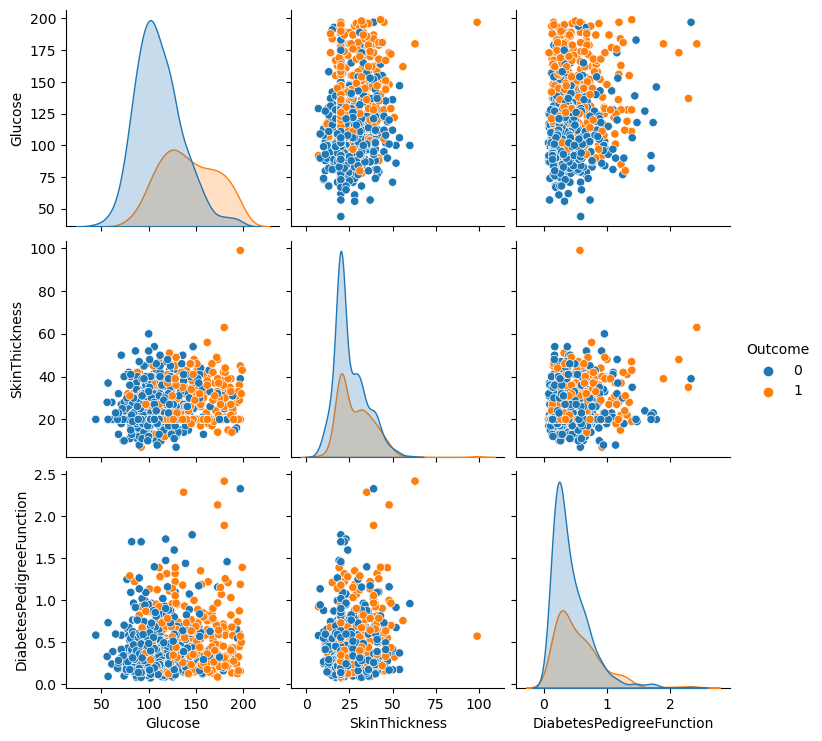

In [22]:
sns.pairplot(data = pima, vars = ['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.show()

#### Write your Answer here: 


In [23]:
pima[['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction']].corr()

,Glucose,SkinThickness,DiabetesPedigreeFunction
Glucose,1.000000,0.158060,0.137158
SkinThickness,0.158060,1.000000,0.157196
DiabetesPedigreeFunction,0.137158,0.157196,1.000000


## Q16. Plot the scatterplot between 'Glucose' and 'Insulin'. Write your observations from the plot. (4 Marks)

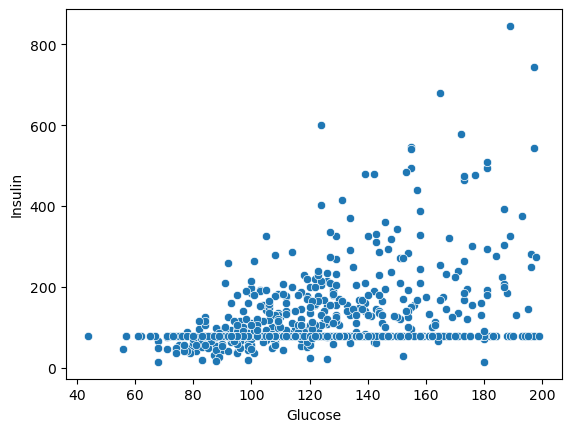

In [24]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', data = pima)
plt.show()

#### Write your Answer here: 


,Glucose,Insulin
Glucose,1.000000,0.396137
Insulin,0.396137,1.000000


<AxesSubplot: >

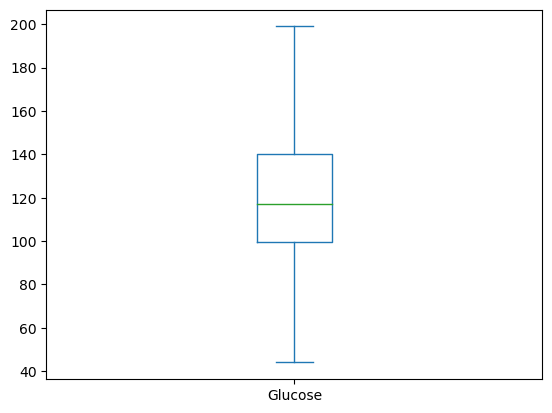

In [25]:
display(pima[['Glucose', 'Insulin']].corr())
pima.Glucose.plot.box()

## Q 17. Plot the boxplot for the 'Age' variable. Are there outliers? (2 Marks)

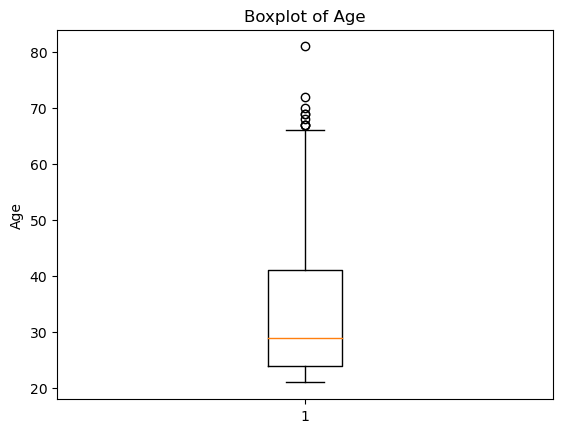

In [26]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

#### Write your Answer here: 


##### Recall:
* Outcome: Class variable <font color=blue>(0: a person is not diabetic or 1: a person is diabetic)</font>

##### Going deeper:
I wonder if the older folks naturally have a good DiabetesPedigreeFunction.  From the calculation below that doesn't appear to tbe case.

In [27]:
display(pima[pima.Age > pima.Age.quantile(0.99)])
pima[pima.Age > pima.Age.quantile(0.99)].DiabetesPedigreeFunction.mean(), pima.DiabetesPedigreeFunction.mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,20,79,26.800000,0.186,69,0
453,2,119,69,20,79,19.600000,0.832,72,0
459,9,134,74,33,60,25.900000,0.460,81,0
666,4,145,82,18,79,32.500000,0.235,70,1
674,8,91,82,20,79,35.600000,0.587,68,0
684,5,136,82,20,79,31.992578,0.640,69,0


(0.49, 0.47187630208333325)

## Q18. Plot histograms for the 'Age' variable to understand the number of women in different age groups given whether they have diabetes or not. Explain both histograms and compare them. (5 Marks)

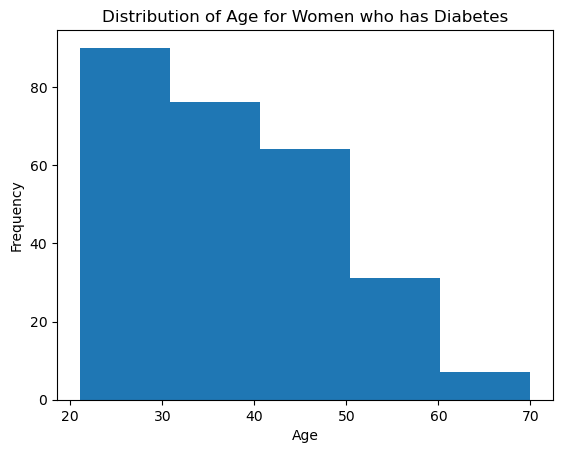

In [28]:
plt.hist(pima[pima['Outcome'] == 1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

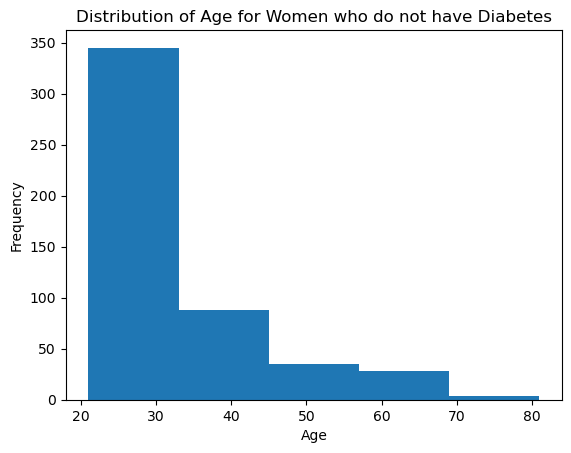

In [29]:
plt.hist(pima[pima['Outcome'] == 0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Write your Answer here: 


##### Going Deeper:
Consider Age Sampling Bais. 

#### See also:
https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b

Text(0.5, 0.98, 'Age Sample Bias')

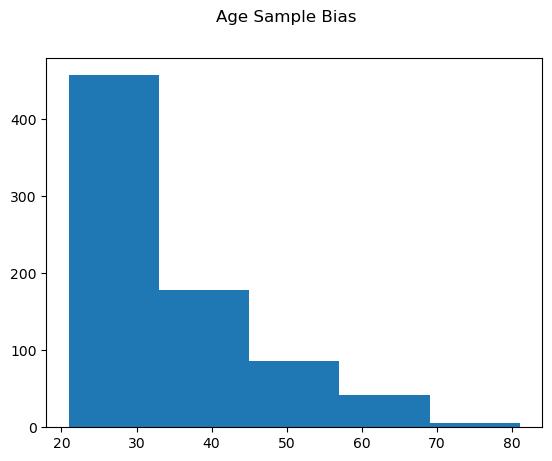

In [30]:
# Let's check our age distribution to see how even it is
plt.hist(pima.Age, bins = 5)
plt.suptitle('Age Sample Bias') # think about why 'suptile()' is required here rather than 'title()'

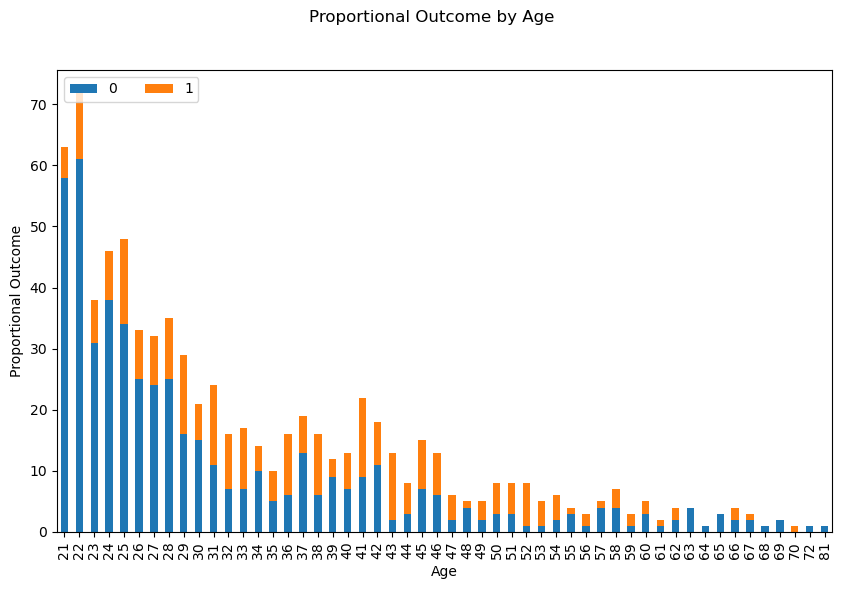

In [31]:
cross_tab_prop = pd.crosstab(index=pima['Age'], columns=pima['Outcome'])
cross_tab_prop.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Age")
plt.ylabel("Proportional Outcome")
plt.suptitle('Proportional Outcome by Age') #again with the 'suptitle()', ask Ben about this
plt.show()

## Q 19. What is the Interquartile Range of all the variables? Why is this used? Which plot visualizes the same? (5 Marks)

In [32]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness               12.0000
Insulin                     48.2500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


#### Write your Answer here: 


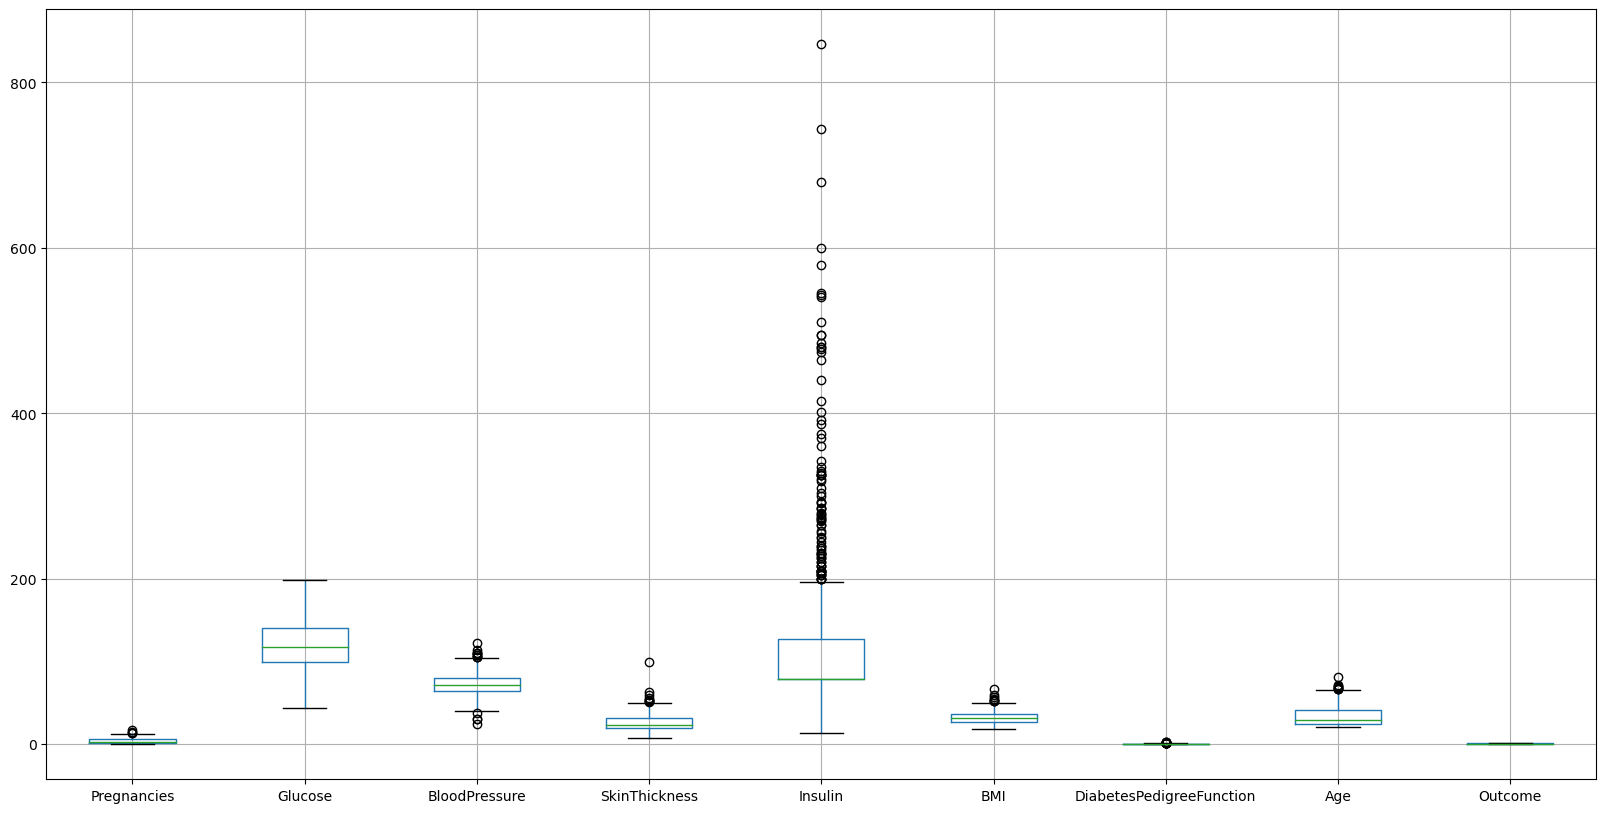

In [64]:
plt.figure(figsize = (20, 10)) 
pima.boxplot();  # almost what I want... let's try again

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


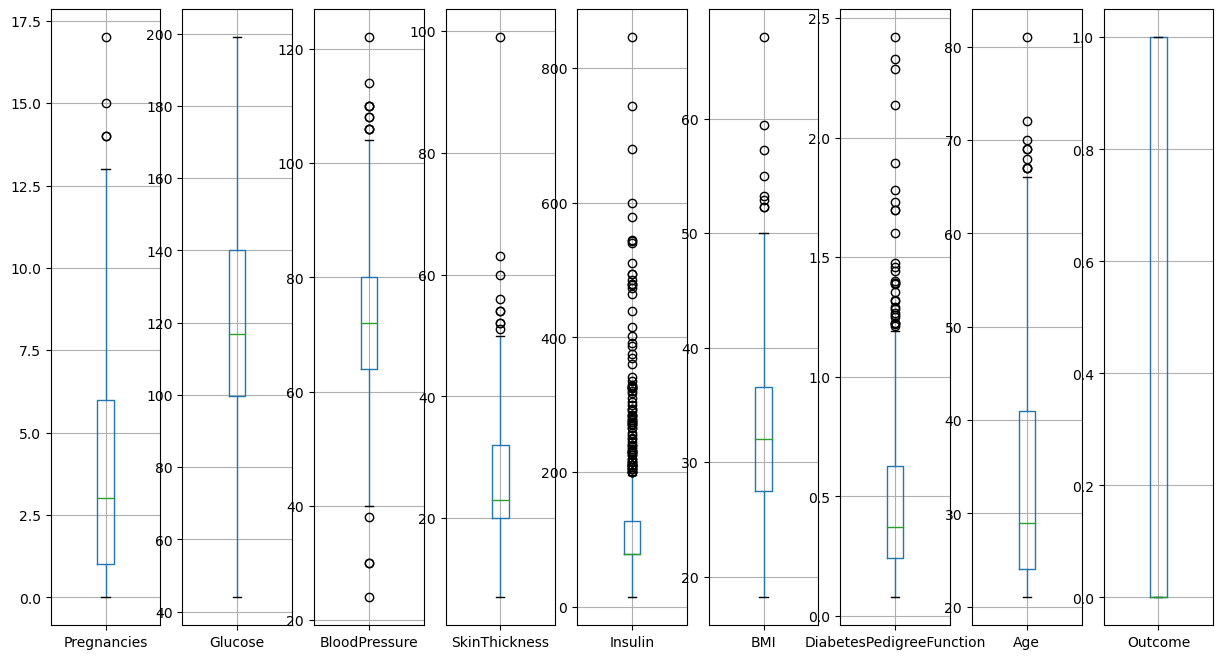

In [65]:
fig, axs = plt.subplots(1,pima.shape[1],figsize=(15,  8), sharey=False)
for i, c in enumerate(list(pima.columns)): # Just make it work for now
    print(c)
    pima.boxplot(c, ax = axs[i]) # good enough, we're not getting paid for this

## Q 20. Find and visualize the correlation matrix. Write your observations from the plot. (3 Marks)

In [35]:
corr_matrix = pima.iloc[ : ,0 : 8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.021546,-0.033523,0.544341
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.231464,0.137158,0.266673
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.281222,0.000471,0.326791
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.532552,0.157196,0.020582
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.189919,0.158243,0.037676
BMI,0.021546,0.231464,0.281222,0.532552,0.189919,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.153508,1.000000,0.033561
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.025748,0.033561,1.000000


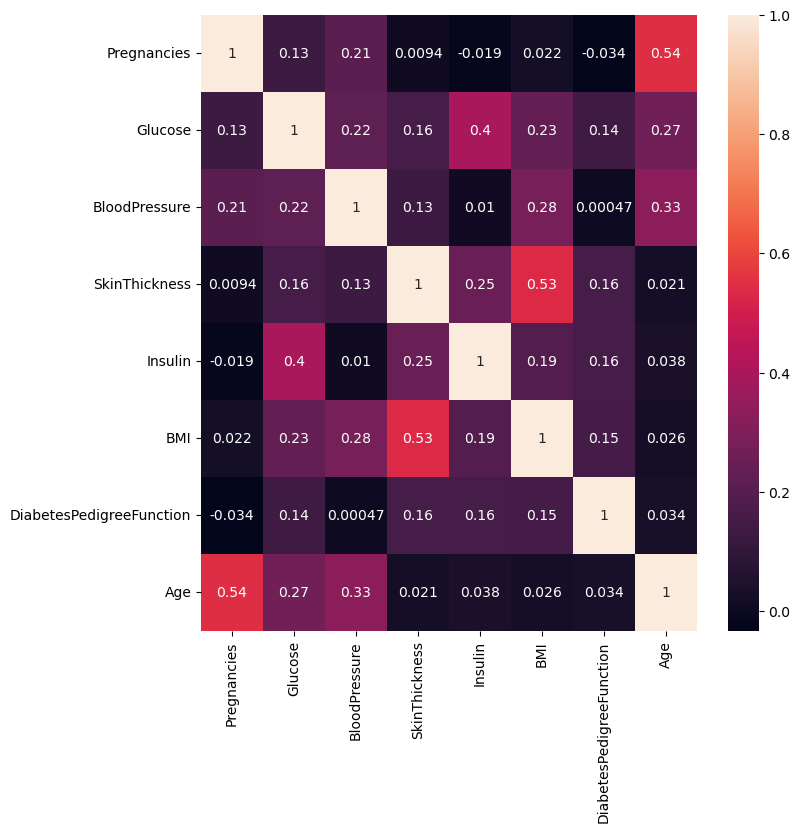

In [36]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_matrix, annot = True)

# Display the plot
plt.show()

#### Write your Answer here: 


##### Going Deeper:
Sort the correlation values

In [37]:
c = pima.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

so[np.logical_and(so > .2, so < 1)].unique()

array([0.54434123, 0.53255191, 0.4928841 , 0.39613656, 0.3267913 ,
       0.31225413, 0.28122173, 0.26667343, 0.2454105 , 0.23835598,
       0.23146375, 0.22189815, 0.21976513, 0.20898726])

In [38]:
su = so.drop_duplicates()
su[np.logical_and(so > .2, so < 1)]

Pregnancies    Age              0.544341
SkinThickness  BMI              0.532552
Outcome        Glucose          0.492884
Insulin        Glucose          0.396137
BloodPressure  Age              0.326791
BMI            Outcome          0.312254
BloodPressure  BMI              0.281222
Age            Glucose          0.266673
Insulin        SkinThickness    0.245410
Age            Outcome          0.238356
Glucose        BMI              0.231464
Outcome        Pregnancies      0.221898
Glucose        BloodPressure    0.219765
Pregnancies    BloodPressure    0.208987
dtype: float64

# Conclusions
We tried to have a bit of fun playing around with Exploratory Data Analysis--adding deeper detail as we worked each question.  We tryied to flex a bit and stretch our EDA skills.  We just might be hooked on Data Science now! 

# Appendix 0. Musings

In [66]:
pima.loc[:, pima.columns!='BMI'].describe() # exclude a dataframe column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,0.471876,33.240885,0.348958
std,3.369578,30.436252,12.117203,9.733872,93.243829,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,2.420000,81.000000,1.000000


In [68]:
help(pima)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 | 